## Softmax
http://cs231n.github.io/linear-classify/#softmax

http://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/

In [1]:
import numpy as np
from __future__ import division

def softmax(x):
    """
    Compute: softmax values for x.
    Return: a NumPy array of the same shape as x, the probabilities for each sample (column) must sum to 1. 
    Note: need to sum row-wise, by default numpy will sum all of the elements of the input array
    """
    x = np.array(x)
    return np.exp(x) / np.exp(x).sum(axis=0)

In [2]:
# 1D-array (which is interpreted as a column vector representing a single sample)
assert np.allclose(softmax([1.0, 2.0, 3.0]),[0.09003057, 0.24472847, 0.66524096])
assert np.all(np.sum(softmax([1.0, 2.0, 3.0])), axis=0)==1

In [3]:
# 2D-array where each column represents a sample, shape (3, 4)
assert np.allclose(softmax(np.array([[1, 2, 3, 6], [2, 4, 5, 6], [3, 8, 7, 6]])),\
                   [[0.09003057, 0.00242826, 0.01587624, 0.33333333],\
                    [0.24472847, 0.01794253, 0.11731043, 0.33333333],\
                    [0.66524096, 0.97962921, 0.86681333, 0.33333333]])
assert np.all(np.sum(softmax(np.array([[1, 2, 3, 6], [2, 4, 5, 6], [3, 8, 7, 6]])), axis=0))==1

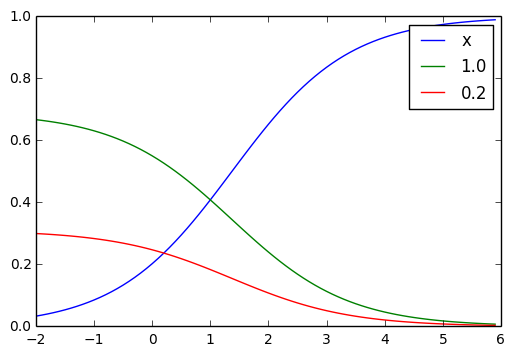

In [4]:
# Plot softmax curves
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

#plt.plot(x, softmax(scores).T, linewidth=2)

lineObjects = plt.plot(x, softmax(scores).T)
plt.legend(iter(lineObjects), ('x', '1.0', '0.2'))

In [5]:
# Multiply the scores by 10. What happens?
scores = np.array([3.0, 1.0, 0.2])
print(softmax(scores))
print(softmax(scores * 10))
print(softmax(scores / 10))

[ 0.8360188   0.11314284  0.05083836]
[  9.99999998e-01   2.06115362e-09   6.91440009e-13]
[ 0.38842275  0.31801365  0.2935636 ]


In [6]:
# Numerical stability
# Adding very small values to a very large one can introduce a lot of errors
x = 10**9

for i in xrange(10**6):
    x += 1e-6

print x - 10**9 # not 1.0 :(

0.953674316406


In [7]:
x = 1

for i in xrange(10**6):
    x += 1e-6

print x - 1

0.999999999918
